Fourth Group Project  9
Group Members

    Rashida Salih
    Japheth Kasomo
    Vincent Wayuga
    Jeannnette Mukangango
    Yusuf Brima

In [1]:
#base libraries for numerical computation
import numpy as np 
import pandas as pd



#Commmand for all regressors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


#Commmand for all classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#Libraries for preprocessing
from sklearn.preprocessing import LabelBinarizer

#SPILITING  DATASET
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Libaries for visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm


# importing other necessary libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# <b> Exercise 1</b>

You are called to build up the best model based on the given data (<b>'hepatitis.csv'</b>) to predict wheather a patient is has Hepatitis B or not. To complete this task, you will proceed as follow: 
- prepare the data, 
- create training/testing sets, 
- instantiate the classifier, 
- train the classifier, 
- make predictions, 
- evaluate performance of classifier.

<b> 5 points bonus for first three best models</b>

In [2]:
dataset=pd.read_csv('hepatitis.csv')
dataset.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [3]:
dataset.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [4]:
dataset.shape

(142, 20)

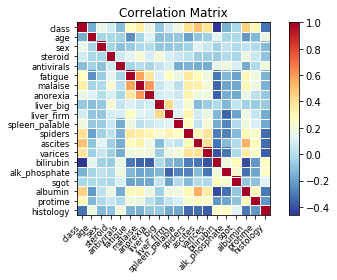

In [5]:
corr = dataset.corr()
sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()

In [6]:

predict = 'histology'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
MX = np.array(dataset.drop(predict, axis=1))
MY = np.array(dataset[predict])


def create_models():
    models = {}
    models['logreg_model'] = LogisticRegression(solver='newton-cg', max_iter=100)
    models['SVC_model'] = SVC(kernel='linear',C=0.025)
    models['Decs_tree'] = DecisionTreeClassifier(max_depth=5)
    models['Gauss'] = GaussianNB()
    models['KNN_model'] = KNeighborsClassifier(n_neighbors=5)
    models['RFC_model'] = RandomForestClassifier(n_estimators=100)
    
    return models

def fit_models(MX,MY):
    MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.1, random_state=42)
    models = create_models()
    trained_models = {}
    for model in models:
        models[model].fit(MX_train, MY_train)
    return models,MX_test,MY_test

In [7]:
results,MX_test,MY_test = fit_models(MX,MY)

def evaluate_models(results,MX_test):
    eval_result = {}
    for model in results:
        eval_result[model]  = results[model].predict(MX_test)
    return eval_result
predicted_results = evaluate_models(results,MX_test)


def print_results(predicted_results,MY_test):
    labels = []
    data = []
    for result in predicted_results:
        print('Accuracy of the {} model: {}'.format(result,accuracy_score(predicted_results[result],MY_test)))
        # But Confusion Matrix
        print(confusion_matrix(predicted_results[result], MY_test))
        #Classification Report give more details about performance
        print(classification_report(predicted_results[result], MY_test))
        print("===========================================================")

In [8]:
print_results(predicted_results,MY_test)

Accuracy of the logreg_model model: 0.9333333333333333
[[8 1]
 [0 6]]
              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       0.86      1.00      0.92         6

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15

Accuracy of the SVC_model model: 0.8666666666666667
[[8 2]
 [0 5]]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.86      0.90      0.86        15
weighted avg       0.90      0.87      0.87        15

Accuracy of the Decs_tree model: 0.6666666666666666
[[7 4]
 [1 3]]
              precision    recall  f1-score   support

           1       0.88      0.64      0.74        11
           2       0.43      0.75

In [9]:
# KNeighbors Classifier and Logistic Regression models are the two best models that can be used as accurate models to make predictions with accuracy of 0.93 each.

# <b> Exercise 2</b>

You are called to build up a the best model based on the given data (<b>'student-mat.csv'</b>) to predict the grade at third trimester ('G3'). To complete this task, you will proceed as follow: 
- prepare the data, 
- create training/testing sets, 
- instantiate the regression model, 
- train the the regression model, 
- make predictions using the regression model , 
- evaluate performance of the regression model.

<b> 5 points bonus for first three best models</b>

In [10]:
data=pd.read_csv('student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [11]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
jk=LabelBinarizer()
data.sex=jk.fit_transform(data.sex)
data.sex.unique()

array([0, 1])

In [13]:
data.famsize=jk.fit_transform(data.famsize)
data.famsize.unique()

array([0, 1])

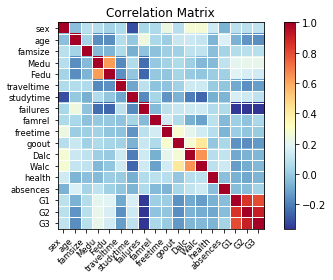

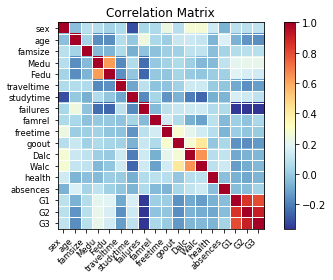

In [14]:
corr=data.corr()
sm.graphics.plot_corr(corr,xnames=list(corr.columns))

In [15]:
data= data[['sex','famsize','studytime','famrel','absences','G1','G2','G3']]
predict ='G3'
 
print(data.info())    

    
MX = np.array(data.drop(predict,axis=1))
MY = np.array(data[predict])
def create_regressor_models():
    models = {}
    models['Multi_lr'] = LinearRegression()
    models['DTR']  = DecisionTreeRegressor(random_state=42)
    models['SVR_lr'] = SVR(C=1.0,epsilon=0.2,gamma='scale')
    models['LDA'] = LinearDiscriminantAnalysis()
    models['RaFR'] = RandomForestRegressor(n_estimators=10,max_depth=4,random_state=0)
    return models

def fit_regressor_models(MX,MY):
    MX_train, MX_test, MY_train, MY_test = MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.6, random_state=42)
    models = create_regressor_models()
    trained_models = {}
    for model in models:
        models[model].fit(MX_train, MY_train)
    return models,MX_test,MY_test,models

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sex        395 non-null    int64
 1   famsize    395 non-null    int64
 2   studytime  395 non-null    int64
 3   famrel     395 non-null    int64
 4   absences   395 non-null    int64
 5   G1         395 non-null    int64
 6   G2         395 non-null    int64
 7   G3         395 non-null    int64
dtypes: int64(8)
memory usage: 24.8 KB
None


In [16]:
results,MX_test,MY_test,models = fit_regressor_models(MX,MY)

def evaluate_regressor_models(results,MX_test):
    eval_result = {}
    for model in results:
        eval_result[model]  = results[model].predict(MX_test)
    return eval_result

predicted_results = evaluate_regressor_models(results,MX_test)


def print_regressor_results(predicted_results,MX_test,MY_test,models):
    labels = []
    data = []
    for model in models:
        print("The R-Squared in {} is  {}".format(model,models[model].score(MX_test,MY_test)))
        print("===========================================================")


In [17]:
print_regressor_results(predicted_results,MX_test,MY_test,models)

The R-Squared in Multi_lr is  0.8311861719398237
The R-Squared in DTR is  0.7744953294161638
The R-Squared in SVR_lr is  0.7860785408177161
The R-Squared in LDA is  0.3459915611814346
The R-Squared in RaFR is  0.8595236771126608


In [18]:
#Random forest regression  is our best model with accuracy of 0.859 and we can use it as prediction model.
#Multiple linear regression comes second best with accuracy of 0.8311.